In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)




In [3]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
# Groupby "Film" and "Category" to get count of 
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index()
# .rename(columns={"index":"Title", "film":"Nomination"})
df2

,film,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1
...,...,...,...
9971,the end,SHORT FILM (Animated),1
9972,tom thumb,SPECIAL EFFECTS,1
9973,À Nous la Liberté,ART DIRECTION,1
9974,Ådalen '31,FOREIGN LANGUAGE FILM,1


In [5]:
# Count of nominations for titles across all award categories

df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Moulin Rouge,15
3,Mutiny on the Bounty,15
4,Little Women,14
...,...,...
4828,Marines in the Making,1
4829,The Kansan,1
4830,Inside Fighting China,1
4831,Just Another Missing Kid,1


In [6]:
# Count of wins for titles across all award categories

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4.head()

,Title,Wins
0,Titanic,12
1,The Lord of the Rings: The Return of the King,11
2,Ben-Hur,11
3,West Side Story,10
4,Gigi,9


In [7]:
# Dataframe of all Academy Award nominations and wins
wins_nominations_df = pd.merge(df2, df4, on="Title", how="left")
wins_nominations_df = wins_nominations_df.fillna(0)
wins_nominations_df

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Moulin Rouge,15,4.0
3,Mutiny on the Bounty,15,1.0
4,Little Women,14,3.0
...,...,...,...
4828,Marines in the Making,1,0.0
4829,The Kansan,1,0.0
4830,Inside Fighting China,1,0.0
4831,Just Another Missing Kid,1,1.0


In [8]:
# Clean up movies_df by dropping unnamed column and resetting index

movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [9]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [10]:
# Merge on left dataframe to keep all streaming movies

# First merge cleaned movies dataframe with count of all award wins and nominations
movies_clean_df2 = pd.merge(movies_clean_df, wins_nominations_df, on="Title", how="left")

# Second merge above dataframe with Best Picture win ("True, False, NaN")
combined_df = pd.merge(movies_clean_df2, oscars_clean_df, how="left")
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN


In [11]:
# Slice new combined_df to count of Netflix movies that were nominated for Best Picture
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               32
Year                32
Age                 32
IMDb                32
Rotten Tomatoes     32
Netflix             32
Hulu                32
Prime Video         32
Disney+             32
Type                32
Directors           31
Genres              32
Country             32
Language            32
Runtime             32
Nomination          32
Wins                32
Won Best Picture    32
dtype: int64

In [12]:
# "Won Best Picture" values are currently: 
# True = Won
# False = Nominated
# NaN = Not Nominated

combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [13]:
# Change "Won Best Picture" values to: 
# 2 = Won
# 1 = Nominated
# 0 = Not Nominated

combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [14]:
combined_df.head()

# Fill NaN in Nomination, Runtime, and Wins with 0
combined_df["Nomination"] = combined_df["Nomination"].fillna(0)
combined_df["Runtime"] = combined_df["Runtime"].fillna(0)
combined_df["Wins"] = combined_df["Wins"].fillna(0)
combined_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0.0,0.0,0.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0.0,0.0,0.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0,0.0,0.0,0.0
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0,0.0,0.0,0.0


In [15]:
# Sort Academy Award nominated movies by highest IMDb rating ("Won Best Picture": 1=Nominated, 2=Won)
imdb_df = combined_df[combined_df["Won Best Picture"]==1].sort_values("IMDb", ascending=False).head(10)

# IMDb highest ratings, broken down by service
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Hulu"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Prime Video"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Disney+"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

imdb_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
3564,The Green Mile,1999,18+,8.6,78%,0,1,0,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0,4.0,0.0,1.0
4439,It's a Wonderful Life,1946,7+,8.6,94%,0,0,1,0,0,Frank Capra,"Drama,Family,Fantasy",United States,"English,French",130.0,5.0,0.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,5.0,2.0,1.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,9.0,5.0,1.0
16222,Toy Story 3,2010,all,8.3,98%,0,0,0,1,0,Lee Unkrich,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Spanish",103.0,5.0,2.0,1.0
10,Taxi Driver,1976,18+,8.3,95%,1,0,0,0,0,Martin Scorsese,"Crime,Drama",United States,"English,Spanish",114.0,4.0,0.0,1.0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,8.0,1.0,1.0
3563,Good Will Hunting,1997,18+,8.3,97%,0,1,0,0,0,Gus Van Sant,"Drama,Romance",United States,English,126.0,9.0,2.0,1.0


In [16]:
# Fill NaN values with Unknown
combined_df2 = combined_df.fillna("Unknown")


In [17]:
# Split and count each genre

genre_count = {}
for Genres in combined_df2["Genres"].values:
    genres_list = Genres.split(",")
    for genre in genres_list:
        genre = genre.strip()
        if genre not in genre_count:
            genre_count[genre]=0
        genre_count[genre] +=1
genre_count

{'Action': 2683,
 'Adventure': 1778,
 'Sci-Fi': 1228,
 'Thriller': 3354,
 'Comedy': 4637,
 'Western': 499,
 'Animation': 711,
 'Family': 1514,
 'Biography': 821,
 'Drama': 7227,
 'Music': 667,
 'War': 539,
 'Crime': 1833,
 'Fantasy': 1089,
 'Romance': 2359,
 'History': 715,
 'Mystery': 1274,
 'Horror': 2201,
 'Sport': 404,
 'Documentary': 2546,
 'Musical': 401,
 'News': 105,
 'Short': 386,
 'Unknown': 275,
 'Reality-TV': 22,
 'Talk-Show': 19,
 'Game-Show': 7,
 'Film-Noir': 79}

In [18]:
combined_df2

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,Unknown,6.2,Unknown,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0.0,0.0,0.0
16740,The Poof Point,2001,7+,4.7,Unknown,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0.0,0.0,0.0
16741,Sharks of Lost Island,2013,Unknown,5.7,Unknown,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0,0.0,0.0,0.0
16742,Man Among Cheetahs,2017,Unknown,6.6,Unknown,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0,0.0,0.0,0.0


In [19]:
country_df = combined_df['Country'].value_counts()
country_df

United States                                                   8776
India                                                           1064
United Kingdom                                                   905
Canada                                                           555
Australia                                                        202
                                                                ... 
United States,Brazil,Portugal,Canada                               1
United States,Panama,Mexico                                        1
Spain,Belgium,Switzerland,United States,China,United Kingdom       1
Israel,Hungary                                                     1
United States,United Kingdom,Brazil                                1
Name: Country, Length: 1303, dtype: int64

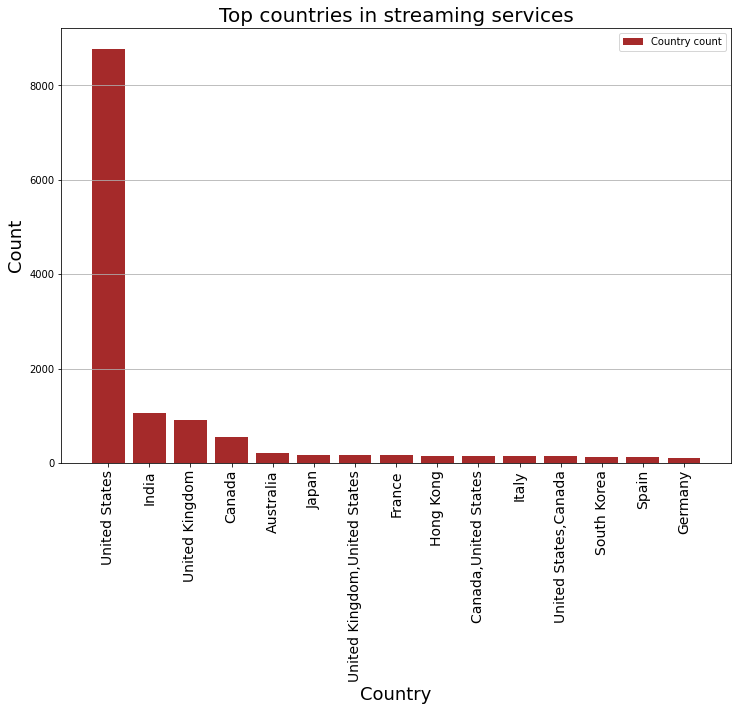

In [69]:
#Select the top 15 countries by value counts
country_top = country_df[0:15]
country_top_df=country_top.to_frame().reset_index().rename(columns={'index':'Country', 'Country':'Counts'})
#country_top_df=country_top_df.set_index('Country')
#country_top_df.dtypes
#country_top_df.isnull().count

#Specify x & y values
xvalues = country_top_df['Country'].values
yvalues= country_top_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Country count', color='brown', alpha = 1, align="center")
plt.xticks(country_top_df['Country'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top countries in streaming services", fontsize=20)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/countries.png")
plt.show()